In [247]:
#work on making this work
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

In [249]:
len(strains)

519

In [252]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

In [18]:
'''
First define a function to read in fasta file.
1. adding line = line.rstrip(), which will remove \n at the end of each line
2. save results as a generator object, with name (strains) and seq (genomes), easier to store and reference

'''
import pandas as pd
import numpy as np

def read_fasta(fp):
        name, seq = None, []
        for line in fp:
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line, []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

            

Extra: 
BioPython is a library designed for reading in fasta format data faster, and easier since it has methods wrapped up. Here is a tutorial if would like to explore more: https://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc11

In [3]:
#adding strain data to one array and genomic data to the other


with open(r'C:/Users/srava/BedfordProjects/zika/results/aligned.fasta') as fp:
    for name, seq in read_fasta(fp):
            strains.append(name)
            genomes.append(seq)

In [4]:
#getting rid of the > in front of the strains in order to merge the aligned.fasta into the metadata.fasta
for i in range(0, len(strains)):
    strains[i] = strains[i].replace('>','')

User manual on MCA: https://github.com/esafak/mca/blob/master/docs/usage.rst

# The matrix below, when constructed as a heat map, should look similar to this: 
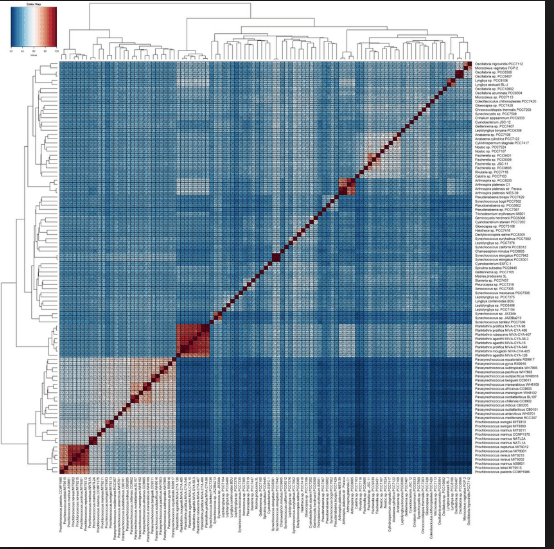

# Similarity Matrix (Where "|" is "Compared To")
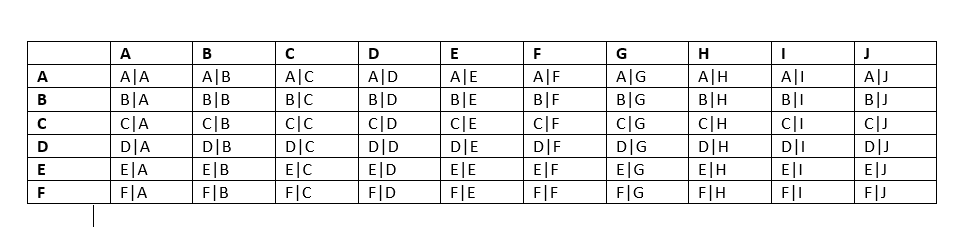

In [5]:
#using distance to calculate PCA (pairwise scores)
#compare substrings
#TFIDF(package)
#string distance (pick multiple and vectorize them)
#pairwise aligner (the average of each strain when compared with multiple other strain)
#creating a similarity matrix

In [20]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 1
    # Return the final count of differences
    return distance

In [21]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa)

     strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0         0.0      12.0      15.0      14.0      19.0      13.0      12.0   
1        12.0       0.0      15.0      14.0      18.0      13.0      11.0   
2        15.0      15.0       0.0      17.0      21.0      16.0      14.0   
3        14.0      14.0      17.0       0.0       8.0      15.0      13.0   
4        19.0      18.0      21.0       8.0       0.0      20.0      19.0   
5        13.0      13.0      16.0      15.0      20.0       0.0      13.0   
6        12.0      11.0      14.0      13.0      19.0      13.0       0.0   
7        13.0      12.0      15.0      12.0      18.0      14.0      13.0   
8        13.0      12.0      15.0      14.0      20.0      14.0      13.0   
9        18.0      19.0      22.0      21.0      27.0      21.0      19.0   
10       18.0      19.0      22.0      21.0      27.0      21.0      19.0   
11       15.0      15.0      16.0      16.0      20.0      16.0      14.0   

In [246]:
dataa.shape

(519, 519)

In [8]:
dataa.to_csv("DistanceMatrix",sep = ',')

AxesSubplot(0.125,0.125;0.62x0.755)


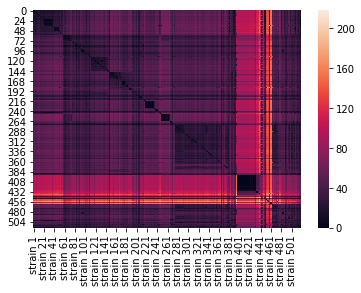

In [23]:
import seaborn as sns
print(sns.heatmap(dataa))

#This is the heat map I was talking about before

In [296]:
from sklearn.decomposition import PCA


#performing PCA on my pandas dataframe 
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(dataa)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component " + str(i) for i in range(1,11)])

In [298]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-149.422029,142.729551,231.600978,-56.167752,-29.934692,8.860758,6.968664,5.267695,-15.347036,-4.367828
1,-181.707429,125.323051,223.006285,-49.662056,-28.442482,6.410040,7.665989,4.261124,-14.640766,-5.035227
2,-91.393783,156.019634,231.105498,-56.454288,-34.427220,5.000896,9.653547,4.396450,-15.323866,2.725954
3,-113.046100,161.837475,238.659224,-59.295516,-30.938435,6.113677,10.712337,9.178146,-13.688195,-5.529627
4,-28.631385,183.928916,235.536151,-48.806171,-21.639508,-1.721045,9.632190,20.741460,15.419871,10.611256


In [299]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [300]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [301]:
metadata_df.shape

(745, 15)

In [302]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [303]:
strains_df.shape

(519, 1)

In [304]:
metadata_df.shape

(745, 15)

In [319]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [320]:
result_strains.shape

(519, 15)

In [307]:
np.setdiff1d(strains_df['strain'].unique(),metadata_df['strain'].unique())

array([], dtype=object)

In [308]:
metadata_df['strain'].unique().shape

(745,)

In [323]:
finalDf = pd.concat([principalDf, result_strains[['region','country','strain']]], axis = 1)

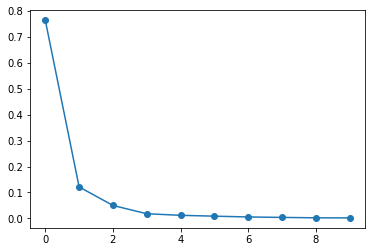

In [324]:
#explained variance for PCA plot below
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_, marker="o")

In [325]:
pca.explained_variance_

array([222066.60473065,  35277.2347927 ,  14509.59263701,   5227.01627978,
         3457.38328365,   2505.28612024,   1611.5865876 ,   1108.72536781,
          666.2395354 ,    545.11193709])

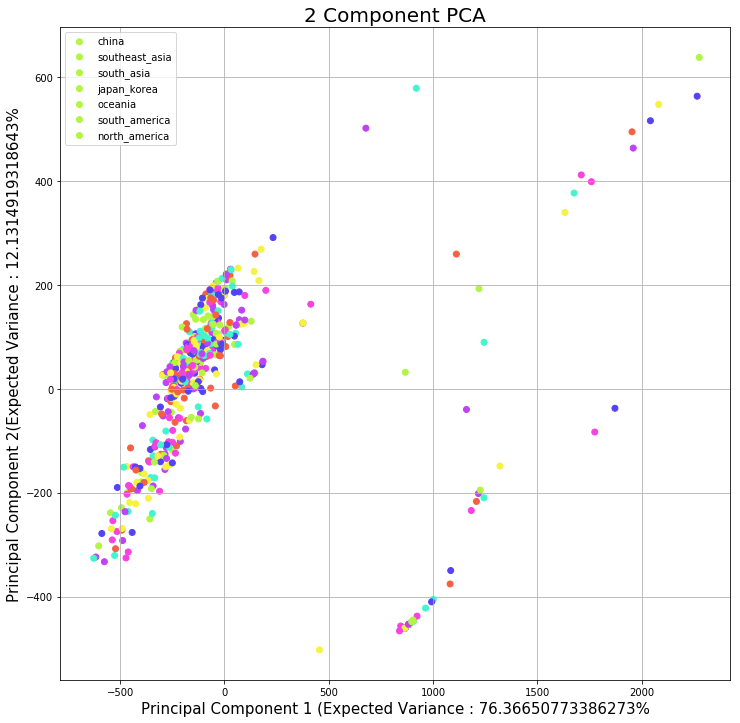

In [326]:
#plotting principal component 1 and 2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 (Expected Variance : {}%'.format(pca.explained_variance_ratio_[0]*100), fontsize = 15)
ax.set_ylabel('Principal Component 2(Expected Variance : {}%'.format(pca.explained_variance_ratio_[1]*100), fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
df = pd.DataFrame(strains) 
cols = ['target']
df.columns = cols


'''
targets = ['india', 'thailand', 'vietnam', 'singapore', 'french_polynesia',
           'american_samoa', 'fiji', 'tonga', 'china', 'taiwan', 'japan', 'italy',
           'brazil', 'peru', 'ecuador', 'colombia', 'french_guiana', 'suriname',
           'venezuela', 'panama', 'nicaragua', 'honduras', 'el_salvador',
           'guatemala', 'mexico', 'martinique', 'guadeloupe', 
           'saint_barthelemy', 'usvi', 'puerto_rico', 'jamaica',
           'dominican_republic', 'haiti', 'cuba', 'usa']
'''
targets=['china', 'southeast_asia', 'south_asia', 'japan_korea', 'oceania', 'south_america', 'north_america']
colors = ['#b3f542','#f56042','#f5f242', '#5442f5', '#f542e0', '#bf42f5', '#42f5ce']

for target,color in zip(targets,colors):
    indicesToKeep = finalDf['region'] == target
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = colors)
ax.legend(targets)
ax.grid()

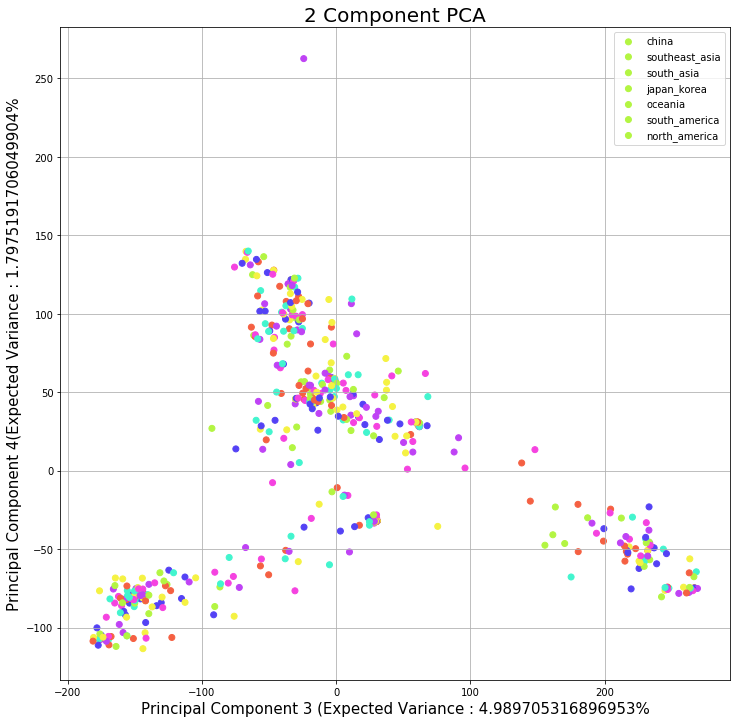

In [327]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3 (Expected Variance : {}%'.format(pca.explained_variance_ratio_[2]*100), fontsize = 15)
ax.set_ylabel('Principal Component 4(Expected Variance : {}%'.format(pca.explained_variance_ratio_[3]*100), fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

df = pd.DataFrame(strains) 
cols = ['target']
df.columns = cols

#finalDf = pd.merge(principalDf, result_df[['country', 'color']],on='country')

targets=['china', 'southeast_asia', 'south_asia', 'japan_korea', 'oceania', 'south_america', 'north_america']
colors = ['#b3f542','#f56042','#f5f242', '#5442f5', '#f542e0', '#bf42f5', '#42f5ce']
from random import randint
"""
colors = [] 
for i in range(0,len(targets)):
    colors.append('#' + '%06X' % randint(0, 0xFFFFFF))
"""
for target,color in zip(targets,colors):
    indicesToKeep = finalDf['region'] == target
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = colors)
ax.legend(targets)
ax.grid()

In [31]:
#look into outliers on the PCA plot and on the heat map (the strain names, the seuqences, and where are they in the phylogeny on nextstrain)

In [32]:
#plot PC2 on a number line (look into using altair)
#maybe try taking the averages of all the distances (like divide by the number of sites) or maybe disregard gaps (like don't take N)

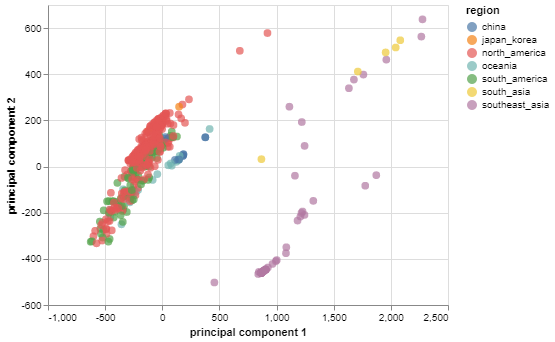

In [332]:
import altair as alt
brush = alt.selection(type='interval', resolve='global')
#link the charts
alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

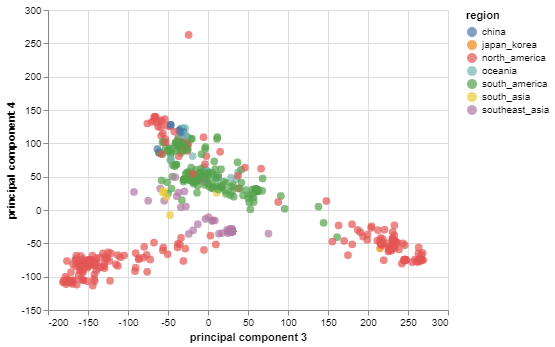

In [331]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()

# Creating the Tree in Altair

In [226]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [227]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [228]:
tree = json_to_tree(json_tree_handle)

In [229]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [230]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [231]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [232]:
node_df = pd.DataFrame(node_data)

In [233]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [234]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [235]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [236]:
node_df.shape

(517, 7)

In [237]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [241]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [239]:
finalDf["region"].unique()

array(['oceania', 'north_america', 'japan_korea', 'europe',
       'south_america', 'southeast_asia', 'china'], dtype=object)

In [242]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [243]:
merged_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,region,strain,country,date,parent_date,parent_y,y
0,-149.422029,142.729551,231.600978,-56.167752,-29.934692,8.860758,6.968664,5.267695,-15.347036,-4.367828,oceania,1_0015_PF,french_polynesia,2014.074529,2013.364170,88.750000,88
1,-181.707429,125.323051,223.006285,-49.662056,-28.442482,6.410040,7.665989,4.261124,-14.640766,-5.035227,oceania,1_0016_PF,french_polynesia,2014.084873,2013.806410,86.000000,87
2,-91.393783,156.019634,231.105498,-56.454288,-34.427220,5.000896,9.653547,4.396450,-15.323866,2.725954,oceania,1_0030_PF,french_polynesia,2013.861232,2013.285736,81.437500,81
3,-113.046100,161.837475,238.659224,-59.295516,-30.938435,6.113677,10.712337,9.178146,-13.688195,-5.529627,oceania,1_0035_PF,french_polynesia,2014.084873,2013.516390,82.375000,82
4,-28.631385,183.928916,235.536151,-48.806171,-21.639508,-1.721045,9.632190,20.741460,15.419871,10.611256,oceania,1_0038_PF,french_polynesia,2014.084873,2012.785690,66.880708,60
5,-124.067777,152.987081,228.575758,-58.056662,-30.840781,7.109049,9.175943,5.330727,-16.684317,-5.122754,oceania,1_0049_PF,french_polynesia,2013.988075,2013.606212,121.838901,93
6,-183.032972,88.169882,233.529658,-46.153609,-12.860419,-3.100186,-0.098809,22.043370,14.540869,12.538670,oceania,1_0080_PF,french_polynesia,2014.161533,2013.758965,84.000000,84
7,-167.367148,109.647928,243.664704,-49.951886,-7.420980,-3.136077,0.024285,23.326614,12.207245,10.478843,oceania,1_0087_PF,french_polynesia,2013.998483,2013.758965,84.000000,85
8,-137.739813,133.915798,233.093915,-45.411437,-18.479821,-0.032874,4.277641,19.624071,17.150951,10.947477,oceania,1_0111_PF,french_polynesia,2014.002738,2013.084747,86.089238,80
9,-1.696951,179.856573,231.997776,-50.853540,-28.358801,-0.712571,4.855566,24.222713,21.823243,11.445345,oceania,1_0117_PF,french_polynesia,2013.917180,2013.606212,121.838901,94


# Linking the Tree with the two other PCA Plots

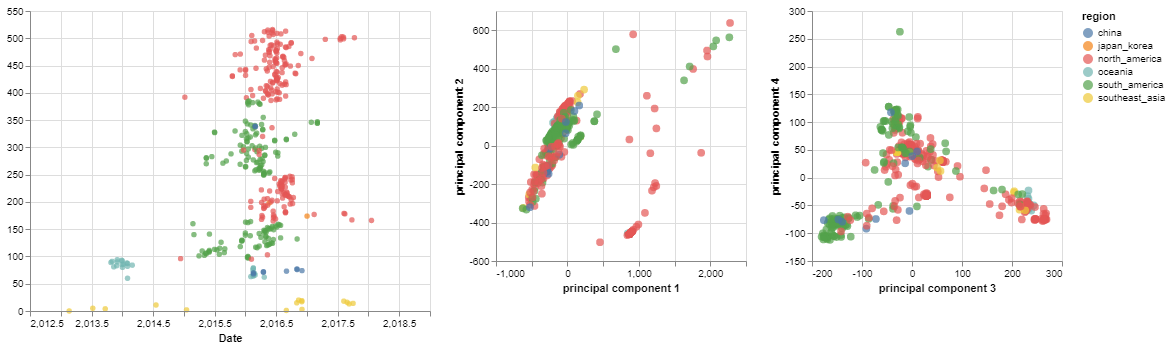

In [333]:
import altair as alt
base = alt.Chart(merged_df)
brush = alt.selection(type='interval', resolve='global')
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush)

#brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = base.mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = base.mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

tree_name|pc1|pc34
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well

In [91]:
#Fix the linkning of the tree AND the two PCA plots
tree.encode(x='date')|pc1.encode(x='principal component 1')|pc34.encode(x='principal component 3') 

## The below code is for the heat map -- it takes a long time to run and should only be used for debugging 

In [20]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        if(len(numbers) < 3):
            numbers.append(strains[i])
            numbers.append(strains[j])
            numbers.append(num)
            matrixOfNum.append(numbers)
            numbers = []
new_data = pd.DataFrame(matrixOfNum, columns = ["Strain A", "Strain B", "distance"], dtype="float")
print(new_data)

KeyboardInterrupt: 

In [ ]:
#to to_csv on the distance dataframe and save it somewhere
#This is the heat map -- dont DONT run this cell unless you need one
alt.data_transformers.disable_max_rows()
alt.Chart(new_data).mark_rect().encode(
    x='Strain A:N',
    y='Strain B:N',
    color='distance:Q',
    tooltip = ['Strain A', "Strain B","distance"]
).interactive()


In [147]:
print(str(len(node_df.dropna())) + " this is node_Df")
print(str(len(finalDf.dropna())) + " this is finalDf")

940 this is node_Df
519 this is finalDf


ValueError: len(left_on) must equal the number of levels in the index of "right"

In [150]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [153]:
node_df_mismatch = node_df[node_df['strain'].isin(merged_df['strain'].tolist())]

In [158]:
node_df_mismatch[['strain','region']]

,strain,region
3,THA/PLCal_ZV/2013,southeast_asia
4,SI_BKK01,southeast_asia
6,SV0010/15,southeast_asia
8,SK403/13AS,southeast_asia
9,DMSc05684_16,southeast_asia
11,SK364/13AS,southeast_asia
23,THA/2014/SV0127_14,southeast_asia
26,SI_BKK06,southeast_asia
29,BKK07,southeast_asia
31,Thailand/1610acTw,southeast_asia


In [173]:
finalDf_mismatch = finalDf[finalDf['strain'].isin(node_df['strain'].tolist())]

In [174]:
finalDf_mismatch[['strain','region']]

,strain,region
0,1_0015_PF,oceania
1,1_0016_PF,oceania
2,1_0030_PF,oceania
3,1_0035_PF,oceania
4,1_0038_PF,oceania
5,1_0049_PF,oceania
6,1_0080_PF,oceania
7,1_0087_PF,oceania
8,1_0111_PF,oceania
9,1_0117_PF,oceania


In [178]:
finalDf_mismatch[['strain']].equals(node_df_mismatch[['strain']])

False

In [191]:
new_Df = finalDf_mismatch[~finalDf_mismatch['strain'].isin(node_df_mismatch['strain'])]

In [193]:
new_Df2 = node_df_mismatch[~node_df_mismatch['strain'].isin(finalDf_mismatch['strain'])]

In [192]:
new_Df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,region,strain
519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north_america,NIC/8610_13A1/2016
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north_america,Nica1_16
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north_america,Nica2_16
522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,southeast_asia,NIID123/2016
523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,south_america,NL00013
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,south_america,SL1602
525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,south_america,Z1106033
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north_america,PAN/BEI_259634_V4/2016
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north_america,PAN/CDC_259249_V1_V3/2015
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north_america,PAN/CDC_259359_V1_V3/2015


In [194]:
new_Df2

,country,date,parent_date,parent_y,region,strain,y


In [196]:
s1 = {1,1,2}

In [197]:
s2 = {1,2,3,4}

In [199]:
s1.intersection(s2)

{1, 2}

In [200]:
s3 = s1 - s2

In [201]:
s3

set()

In [202]:
s4 = s2 - s1

In [203]:
s4

{3, 4}

In [206]:
node_df_strains = node_df['strain'].unique()

In [207]:
finalDf_strains = finalDf['strain'].unique()

In [210]:
differences_node_only = np.setdiff1d(node_df_strains, finalDf_strains)

In [211]:
difference_finalDf_only = np.setdiff1d(finalDf_strains,node_df_strains)

In [212]:
differences_node_only

array(['NODE_0000001', 'NODE_0000003', 'NODE_0000004', 'NODE_0000005',
       'NODE_0000006', 'NODE_0000008', 'NODE_0000009', 'NODE_0000010',
       'NODE_0000011', 'NODE_0000013', 'NODE_0000014', 'NODE_0000015',
       'NODE_0000016', 'NODE_0000018', 'NODE_0000019', 'NODE_0000020',
       'NODE_0000022', 'NODE_0000028', 'NODE_0000030', 'NODE_0000032',
       'NODE_0000036', 'NODE_0000037', 'NODE_0000038', 'NODE_0000040',
       'NODE_0000041', 'NODE_0000042', 'NODE_0000043', 'NODE_0000045',
       'NODE_0000046', 'NODE_0000048', 'NODE_0000050', 'NODE_0000051',
       'NODE_0000054', 'NODE_0000056', 'NODE_0000058', 'NODE_0000059',
       'NODE_0000060', 'NODE_0000064', 'NODE_0000065', 'NODE_0000066',
       'NODE_0000068', 'NODE_0000071', 'NODE_0000072', 'NODE_0000073',
       'NODE_0000075', 'NODE_0000076', 'NODE_0000077', 'NODE_0000079',
       'NODE_0000080', 'NODE_0000081', 'NODE_0000082', 'NODE_0000083',
       'NODE_0000090', 'NODE_0000092', 'NODE_0000094', 'NODE_0000095',
      